# Lab 3 pt. I - Pandas Data Cleaning

## Déborah MATEYA & Joyce SEBEYA

## Importing Libraries 

In [770]:
import pandas as pd 
import numpy as np
import seaborn as sns
import re 
import matplotlib.pyplot as plt

## Data Loading 

#### 1. Load the heroes_information.csv as heroes_df


In [771]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [772]:
# heroes_df = pd.read_csv('heroes_information.csv', index_col=0)

#### 1/ Can you remove the column “Unnamed: 0”


In [773]:
heroes_df = heroes_df.drop(columns=['Unnamed: 0'])  
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [774]:
heroes_df.shape

(734, 10)

#### 2. Add assertion statements that check the dataframe was loaded correctly

In [775]:
# 1. Check if the dataframe is ok
assert heroes_df.shape == (734, 10), "Dataframe shape is incorrect"

#2. Check columns names 
col_names = ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 
             'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']
assert list(heroes_df.columns) == col_names, "Column names are incorrect"


In [776]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


734 rows, 10 columns 
8 columns object type and 2 float64 type. 

#### 4. Are there any missing values

In [777]:
heroes_df.isna().sum()


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

We have 15 missing values in "publisher" column and 2 in "weight" column

In [778]:
power_df = pd.read_csv('super_hero_powers.csv')
power_df.head()

,Unnamed: 0,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
0,Agility,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,Accelerated Healing,False,True,True,False,True,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
2,Lantern Power Ring,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Dimensional Awareness,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Cold Resistance,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [779]:
power_df.reset_index(inplace=True)
power_df.head(3)

,index,Unnamed: 0,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
0,0,Agility,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,1,Accelerated Healing,False,True,True,False,True,False,False,True,...,False,True,True,False,False,False,False,False,False,False
2,2,Lantern Power Ring,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [780]:
power_df = power_df.rename(columns={'Unnamed: 0': 'Indexes'})
power_df = power_df.drop(columns=['index'])
power_df.head(3)

,Indexes,3-D Man,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,...,Wonder Man,Wonder Woman,X-23,X-Man,Yellowjacket,Yellowjacket II,Ymir,Yoda,Zatanna,Zoom
0,Agility,True,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,Accelerated Healing,False,True,True,False,True,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
2,Lantern Power Ring,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 5.Repeating the same process for power_df dataset

In [781]:
power_df.shape

(167, 668)

In [782]:
col_names = power_df.columns
col_names = col_names.to_list()

In [783]:
assert power_df.shape == (167, 668), "Dataframe shape is incorrect" 
assert power_df.columns.to_list() == col_names, "Column names are incorrect"

In [784]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Columns: 668 entries, Indexes to Zoom
dtypes: bool(667), object(1)
memory usage: 110.2+ KB


In [785]:
power_df.isna().sum()

Indexes            0
3-D Man            0
A-Bomb             0
Abe Sapien         0
Abin Sur           0
                  ..
Yellowjacket II    0
Ymir               0
Yoda               0
Zatanna            0
Zoom               0
Length: 668, dtype: int64

#### 6.Publisher column

In [786]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [787]:
with_missing_values = heroes_df[heroes_df["Publisher"].isna()]

print("Sampling 5 values with missing publisher values :")
with_missing_values.sample(5)

Sampling 5 values with missing publisher values :


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
542,Rambo,Male,brown,Human,Black,178.0,NaN,-,good,83.0
658,The Cape,Male,-,-,-,-99.0,NaN,-,good,-99.0
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0


In [788]:
without_missing_values = heroes_df[heroes_df["Publisher"].notna()]

print("Sampling 5 values without missing publisher values :")
without_missing_values.sample(5)

Sampling 5 values without missing publisher values :


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,-,358.0
368,John Wraith,Male,brown,-,Black,183.0,Marvel Comics,-,good,88.0
239,Elongated Man,Male,blue,-,Red,185.0,DC Comics,-,good,80.0
206,Darth Maul,Male,yellow / red,Dathomirian Zabrak,-,170.0,George Lucas,red / black,bad,-99.0
596,Sif,Female,blue,Asgardian,Black,188.0,Marvel Comics,-,good,191.0


### 7. Now, implement a strategy to drop rows with missing values


#### First strategy of handling missing values 

##### Dropping by rows

In [789]:
heroes_df.shape

(734, 10)

In [790]:
heroes_df.dropna(axis="rows", how="any", subset=["Publisher"], inplace=True)

In [791]:
734 - 719


15

#### Second strategy of handling missing values 

By analyzing, we notice that we have a proportion of 17 missing values rows over 734 rows. So these values are not relevant and we can just drop it, without necessary dropping a whole column for that. 

In [792]:
# Same result 
heroes_df = heroes_df.dropna()
heroes_df.head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


### 8. Check if there are still missing values in the publisher column.

In [793]:
heroes_df[heroes_df["Publisher"].isna()].sum()

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height        0.0
Publisher       0
Skin color      0
Alignment       0
Weight        0.0
dtype: object

#### 9. What do you notice when running the command which groups rows by publisher values heroes_df["Publisher"].value_counts()?

#### First thing identified : outliers 

In [794]:
publisher_counts = heroes_df["Publisher"].value_counts()
publisher_counts

Publisher
Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Marvel                 9
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Shueisha               4
Icon Comics            4
ABC Studios            4
 DC Comics             3
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

<Axes: xlabel='Publisher'>

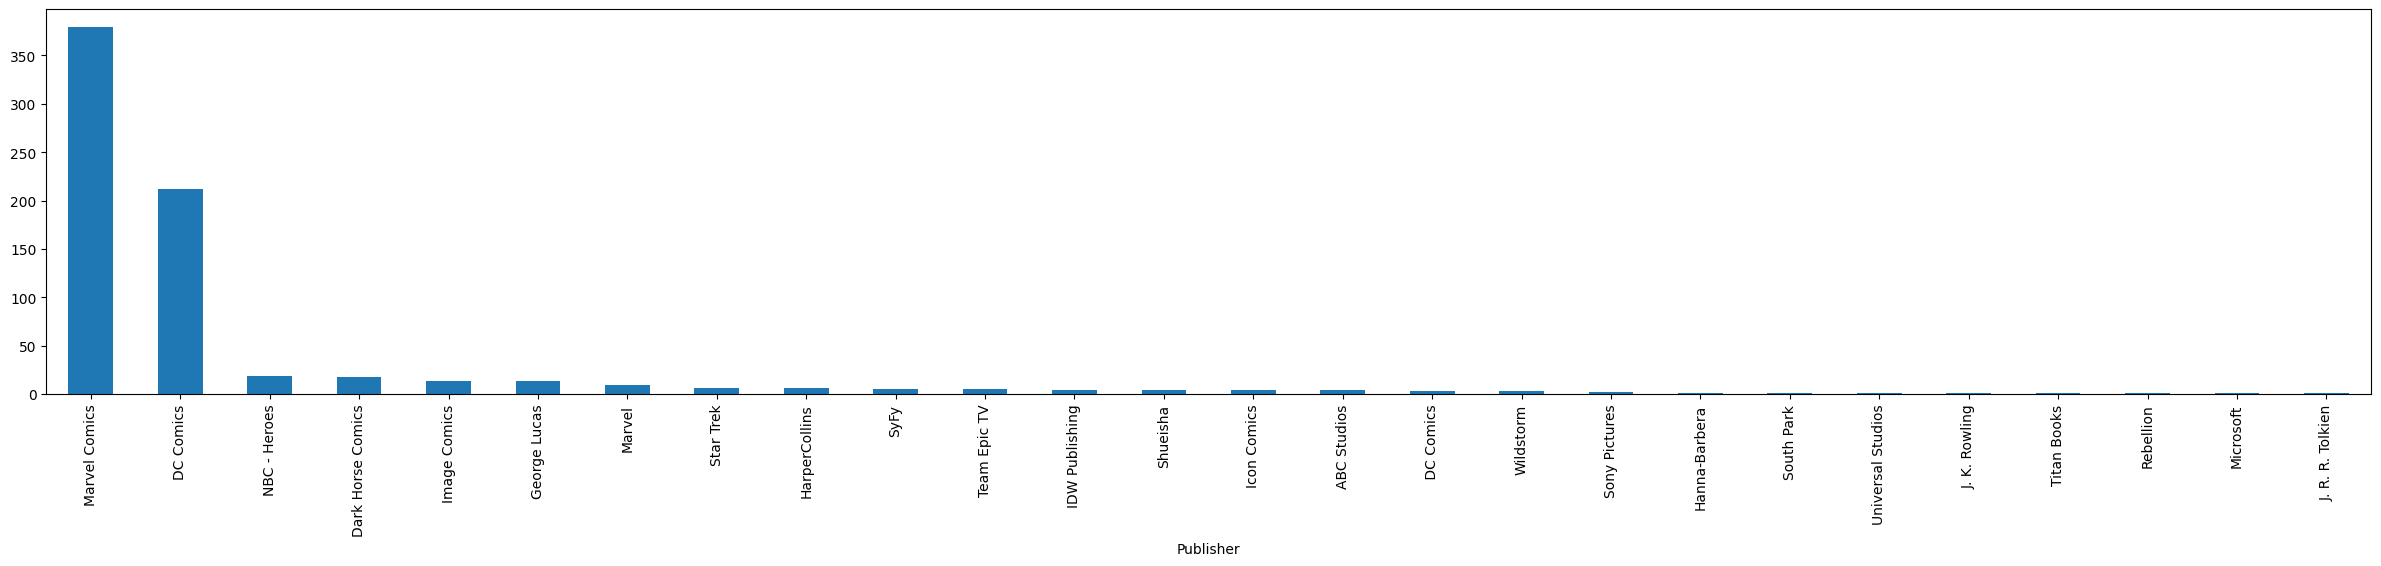

In [795]:
heroes_df["Publisher"].value_counts().plot(kind="bar", figsize=(30,5))

In [796]:
publisher_counts.describe()

count     26.000000
mean      27.653846
std       82.480515
min        1.000000
25%        1.000000
50%        4.000000
75%        8.250000
max      379.000000
Name: count, dtype: float64

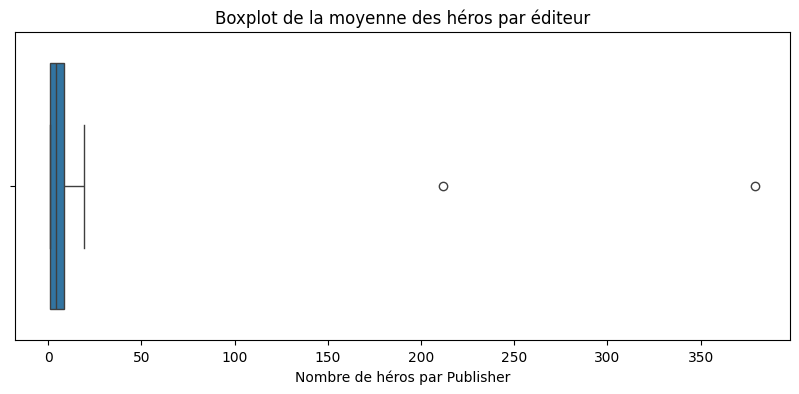

In [797]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=publisher_counts)
plt.title("Boxplot de la moyenne des héros par éditeur")
plt.xlabel("Nombre de héros par Publisher")
plt.show()

By th value counts of the Publisher column, we can notice that these data are unbalanced.Even by investigating his distribution. The boxplot reveals that we have two extreme values for Marvel Comics and DC Comics that we can consider as outliers.

#### Second thing identified : duplicates due to whitespace and bad syntax


In [798]:
publisher_counts

Publisher
Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Marvel                 9
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Shueisha               4
Icon Comics            4
ABC Studios            4
 DC Comics             3
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

In [799]:
df = heroes_df[heroes_df["Publisher"].str.contains("Marvel", case=False, regex=True)]
df["Publisher"].unique()

array(['Marvel Comics', 'Marvel'], dtype=object)

In [800]:
unique_publishers = heroes_df["Publisher"].unique()
unique_publishers

array(['Marvel Comics', 'Dark Horse Comics', ' DC Comics', 'NBC - Heroes',
       'DC Comics', 'Wildstorm', 'Image Comics', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Marvel', 'Shueisha', 'Sony Pictures',
       'J. K. Rowling', 'Titan Books', 'Rebellion', 'Microsoft',
       'J. R. R. Tolkien'], dtype=object)

In [801]:
# Find similar publisher names that create duplicates
similar_publishers = {}

for pub in unique_publishers:
    
    pattern = re.escape(pub.strip()) 
    matches = heroes_df[heroes_df["Publisher"].str.contains(pattern, case=False, regex=True)]["Publisher"].unique()
    
    if len(matches) > 1:
        similar_publishers[pub] = matches.tolist()

for key, values in similar_publishers.items():
    print(f"\n '{key}' looks like : {values}")


 ' DC Comics' looks like : [' DC Comics', 'DC Comics']

 'DC Comics' looks like : [' DC Comics', 'DC Comics']

 'Marvel' looks like : ['Marvel Comics', 'Marvel']


In [802]:
heroes_df["Publisher"] = heroes_df["Publisher"].str.strip()

In [803]:
publisher_counts # Here, we have 379 for marvel comics before replacing

Publisher
Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Marvel                 9
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Shueisha               4
Icon Comics            4
ABC Studios            4
 DC Comics             3
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

In [804]:
# Let's replace the similar names with a single standard name

# Using rename in conjunction with a dictionary
heroes_df["Publisher"] = heroes_df["Publisher"].replace("Marvel", "Marvel Comics")
heroes_df["Publisher"].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [805]:
heroes_df["Publisher"].value_counts() # Now we have 388 for Marvel Comics after replacing

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
Shueisha               4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
South Park             1
Hanna-Barbera          1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 5 Publishers by Count of Superheroes')

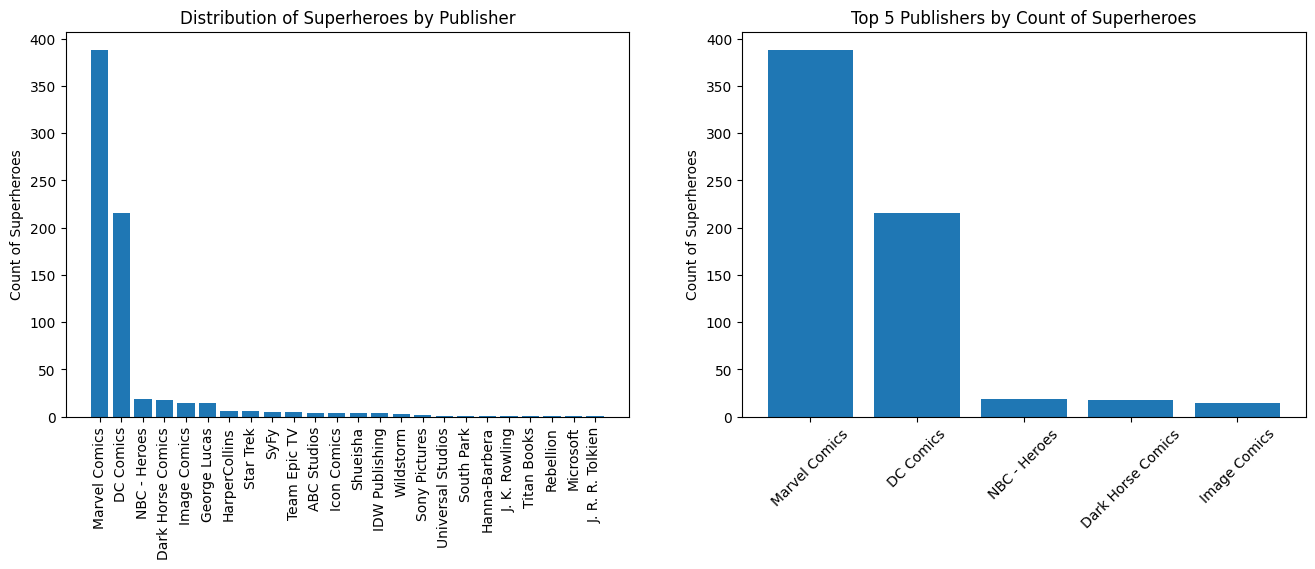

In [806]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data 
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes")

The distribution is highly concentrated with Marvel Comics and DC Comics dominating the superhero landscape, together likely accounting for the majority of superhero characters, followed by a long tail of smaller publishers with fewer superheroes each.

This reflects the real-world comic book industry where Marvel and DC are the two major publishers that have created most of the well-known superhero characters